In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/DATASET.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATASET/TRAIN/R/R_5000.jpg  
  inflating: DATASET/TRAIN/R/R_5001.jpg  
  inflating: DATASET/TRAIN/R/R_5002.jpg  
  inflating: DATASET/TRAIN/R/R_5003.jpg  
  inflating: DATASET/TRAIN/R/R_5004.jpg  
  inflating: DATASET/TRAIN/R/R_5005.jpg  
  inflating: DATASET/TRAIN/R/R_5006.jpg  
  inflating: DATASET/TRAIN/R/R_5007.jpg  
  inflating: DATASET/TRAIN/R/R_5008.jpg  
  inflating: DATASET/TRAIN/R/R_5009.jpg  
  inflating: DATASET/TRAIN/R/R_5010.jpg  
  inflating: DATASET/TRAIN/R/R_5011.jpg  
  inflating: DATASET/TRAIN/R/R_5012.jpg  
  inflating: DATASET/TRAIN/R/R_5013.jpg  
  inflating: DATASET/TRAIN/R/R_5014.jpg  
  inflating: DATASET/TRAIN/R/R_5015.jpg  
  inflating: DATASET/TRAIN/R/R_5016.jpg  
  inflating: DATASET/TRAIN/R/R_5017.jpg  
  inflating: DATASET/TRAIN/R/R_5018.jpg  
  inflating: DATASET/TRAIN/R/R_5019.jpg  
  inflating: DATASET/TRAIN/R/R_5020.jpg  
  inflating: DATASET/TRAIN/R/R_5021.jpg  
  inflating: DATASET/TRAI

In [4]:
my_data_dir = "/content/DATASET"

In [5]:
os.listdir(my_data_dir)

['TEST', 'TRAIN']

In [6]:
test_path = my_data_dir+'/TEST'
train_path = my_data_dir+'/TRAIN'

In [7]:
os.listdir(train_path)

['N', 'R', 'O']

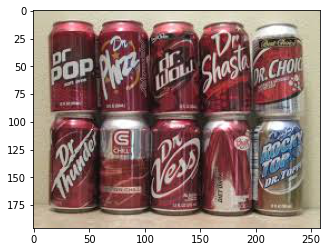

In [8]:
N = train_path+'/N'+'/'+os.listdir(train_path+'/N')[2]
N_img= imread(N)
plt.imshow(N_img)

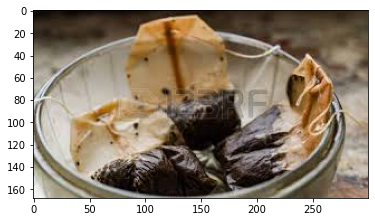

In [9]:
O = train_path+'/O'+'/'+os.listdir(train_path+'/O')[0]
O_img= imread(O)
plt.imshow(O_img)

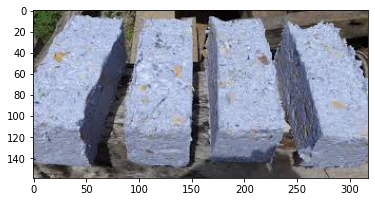

In [10]:
R = train_path+'/R'+'/'+os.listdir(train_path+'/R')[98]
R_img= imread(R)
plt.imshow(R_img)

In [11]:
print("For training data:")
print("N: "+str(len(os.listdir(train_path+'/N'))))
print("O: "+str(len(os.listdir(train_path+'/O'))))
print("R: "+str(len(os.listdir(train_path+'/R'))))

For training data:
N: 2847
O: 12565
R: 7152


In [12]:
print("For testing data:")
print("N: "+str(len(os.listdir(test_path+'/N'))))
print("O: "+str(len(os.listdir(test_path+'/O'))))
print("R: "+str(len(os.listdir(test_path+'/R'))))

For testing data:
N: 397
O: 1401
R: 1112


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

In [15]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=128,
        class_mode='categorical',
        shuffle=True
)

Found 22564 images belonging to 3 classes.


In [17]:
validation_generator = val_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=128,
        class_mode='categorical',
        shuffle=False
)

Found 2907 images belonging to 3 classes.


In [18]:
img_size = 224
batch_size = 128

In [19]:
train_generator.class_indices

{'N': 0, 'O': 1, 'R': 2}

In [20]:
class_names=['Non-Recyclable','Organic','Recyclable']

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(224, 224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

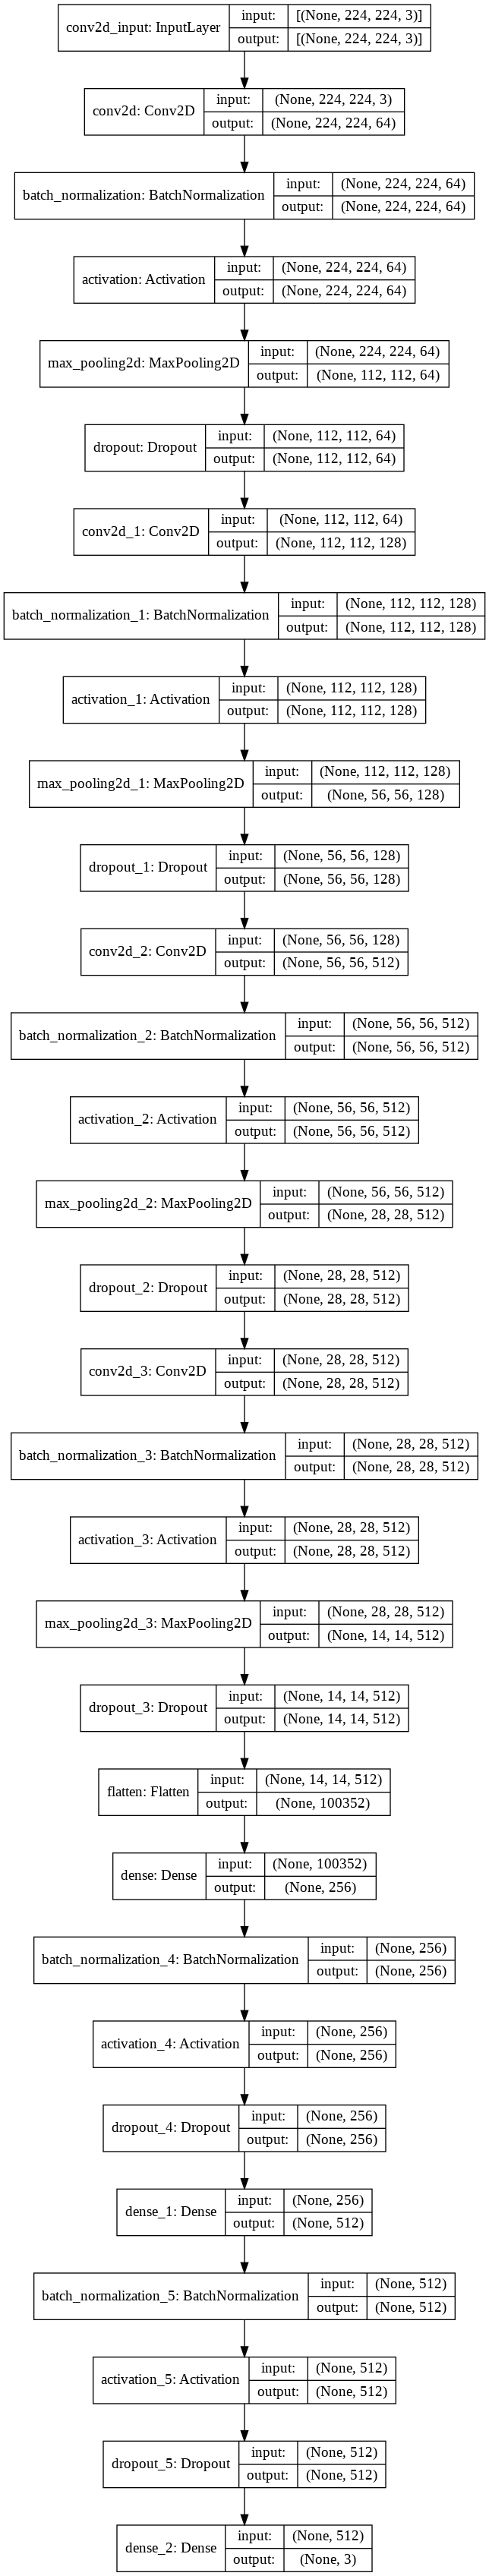

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='Custommodel.png', show_shapes=True, show_layer_names=True)

In [25]:
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint('customcnn.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_weights_only=True,
                             verbose=1)

earlystopping = EarlyStopping(monitor='val_accuracy',
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

callback_list = [earlystopping, checkpoint]

In [ ]:
epochs = 25
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

In [ ]:
history=model.fit(
                train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs,
                callbacks=callback_list,
                validation_data=validation_generator,
                validation_steps=validation_steps)

Epoch 1/25
176/176 [==============================] - 274s 2s/step - loss: 0.7107 - accuracy: 0.7134 - val_loss: 1.2524 - val_accuracy: 0.3626

Epoch 00001: saving model to customcnn.h5
Epoch 2/25
176/176 [==============================] - 263s 1s/step - loss: 0.6168 - accuracy: 0.7561 - val_loss: 0.8785 - val_accuracy: 0.6087

Epoch 00002: saving model to customcnn.h5
Epoch 3/25
176/176 [==============================] - 262s 1s/step - loss: 0.5843 - accuracy: 0.7657 - val_loss: 0.9636 - val_accuracy: 0.6729

Epoch 00003: saving model to customcnn.h5
Epoch 4/25
176/176 [==============================] - 262s 1s/step - loss: 0.5497 - accuracy: 0.7793 - val_loss: 0.8728 - val_accuracy: 0.6701

Epoch 00004: saving model to customcnn.h5
Epoch 5/25
176/176 [==============================] - 261s 1s/step - loss: 0.5339 - accuracy: 0.7865 - val_loss: 0.8938 - val_accuracy: 0.6566

Epoch 00005: saving model to customcnn.h5
Epoch 6/25
176/176 [==============================] - 263s 1s/step - l

In [ ]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("CustomCNNmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CustomCNNmodel.h5")
print("Saved model to disk")

Saved model to disk


In [26]:
from tensorflow.keras.models import model_from_json
with open('/content/drive/MyDrive/waste classification weights/CustomCNNmodel.json','r') as f:
    json = f.read()
model = model_from_json(json)
#best m0del weight
model.load_weights("/content/drive/MyDrive/waste classification weights/customcnn.h5")

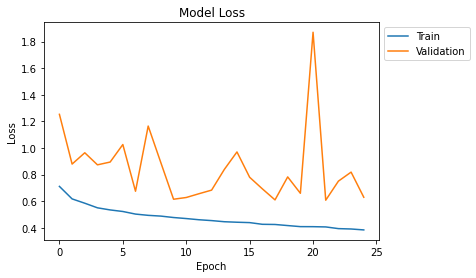

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

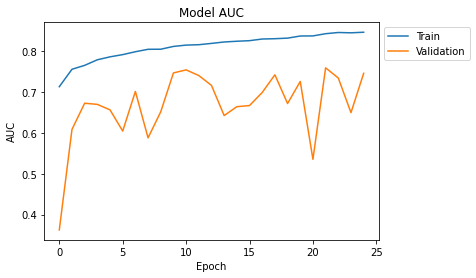

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
model.evaluate(validation_generator)

23/23 [==============================] - 10s 415ms/step - loss: 0.6353 - accuracy: 0.7423


[0.6353186368942261, 0.7423460483551025]

In [27]:
preds = model.predict(validation_generator)
pred = []
for i in preds:
    pred.append(np.argmax(i))

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [29]:
validation_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [30]:
print(confusion_matrix(validation_generator.classes, pred))

[[ 118   78  198]
 [  10 1358   33]
 [ 187  243  682]]


In [31]:
df=confusion_matrix(validation_generator.classes, pred)

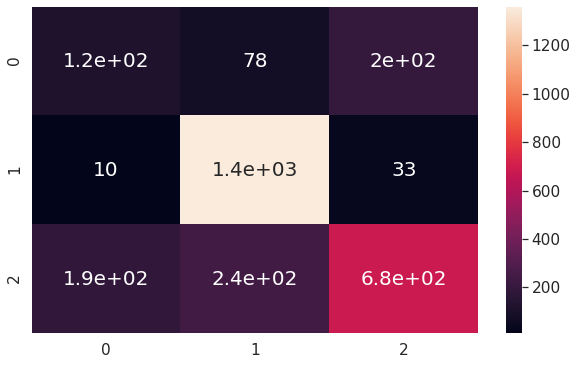

In [32]:
df_cm = pd.DataFrame(df, range(3), range(3))
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

plt.show()

In [33]:
print(classification_report(validation_generator.classes, pred,target_names=class_names))

                precision    recall  f1-score   support

Non-Recyclable       0.37      0.30      0.33       394
       Organic       0.81      0.97      0.88      1401
    Recyclable       0.75      0.61      0.67      1112

      accuracy                           0.74      2907
     macro avg       0.64      0.63      0.63      2907
  weighted avg       0.73      0.74      0.73      2907



In [34]:
encoder_model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
encoder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_18 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
activation_18 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 128)     204928

In [35]:
output_train=encoder_model.predict(train_generator)
output_test=encoder_model.predict(validation_generator)

In [36]:
output_train.shape

(22564, 512)

In [37]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_generator.labels)
test_labels = to_categorical(validation_generator.labels)
print("Train Labels", train_labels.shape)
print("Test Labels", test_labels.shape)

Train Labels (22564, 3)
Test Labels (2907, 3)


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)

In [39]:
rf_model.fit(output_train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
rf_preds = rf_model.predict(output_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [42]:
print(confusion_matrix(validation_generator.classes,rf_preds.argmax(axis=1)))

[[  68  324    2]
 [ 176 1224    1]
 [ 181  929    2]]


In [43]:
df=confusion_matrix(validation_generator.classes,rf_preds.argmax(axis=1))

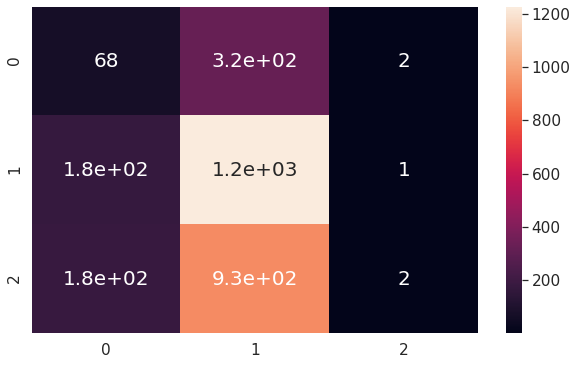

In [44]:
df_cm = pd.DataFrame(df, range(3), range(3))
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

plt.show()

In [45]:
print(classification_report(test_labels.argmax(axis=1),rf_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.16      0.17      0.17       394
           1       0.49      0.87      0.63      1401
           2       0.40      0.00      0.00      1112

    accuracy                           0.45      2907
   macro avg       0.35      0.35      0.27      2907
weighted avg       0.41      0.45      0.33      2907



In [46]:
from xgboost import XGBClassifier

In [47]:
xgb_model = XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=100, random_state=24) 
               

In [48]:
xgb_model.fit(output_train, train_generator.classes)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=24,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
xgb_preds = xgb_model.predict(output_test)

In [50]:
print(confusion_matrix(validation_generator.classes,xgb_preds))

[[   0  391    3]
 [   1 1383   17]
 [   0 1096   16]]


In [51]:
df=confusion_matrix(validation_generator.classes,xgb_preds)

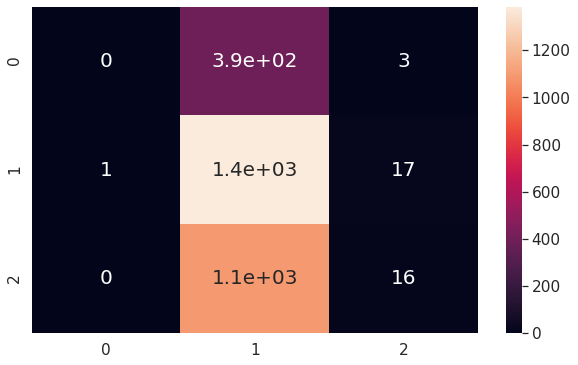

In [52]:
df_cm = pd.DataFrame(df, range(3), range(3))
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

plt.show()

In [53]:
print(classification_report(test_labels.argmax(axis=1),xgb_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.48      0.99      0.65      1401
           2       0.44      0.01      0.03      1112

    accuracy                           0.48      2907
   macro avg       0.31      0.33      0.23      2907
weighted avg       0.40      0.48      0.32      2907

